# Mini Jupyter Exercise #1:

__Year:__ [ 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010 ]

__GDP__ [ 1.015, 1.33, 2.29, 3.26, 4.951, 6.759, 9.366, 13.131, 15.599 ]

| Year | GDP |
| --- | --- |
| 1930 | 1.015 |
| 1940 | 1.33 |
| 1950 | 2.29 |
| 1960 | 3.26 |
| 1970 | 4.951 |
| 1980 | 6.759 |
| 1990 | 9.366 |
| 2000 | 13.131 |
| 2010 | 15.599 |


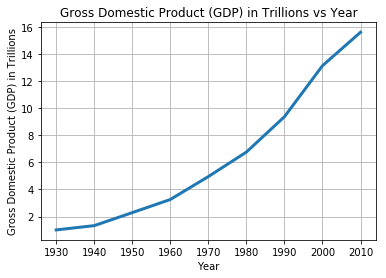

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

years = [1930,1940,1950,1960,1970,1980,1990,2000,2010]

gdp = [1.015,1.33,2.29,3.26,4.951,6.759,9.366,13.131,15.599]

plt.plot(years, gdp, linewidth=3)
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product (GDP) in Trillions')
plt.title('Gross Domestic Product (GDP) in Trillions vs Year')
plt.grid(True)

At first glace, the graph appears to have a positive correlation and one would try to use a linear model to estimate the data. However, a line from the first data point to the last data point would miss many of the other points bewteen. 

Then considering the curve of the graph, a good estimation would be a quadratic model since the curve resembles the right side of a parabola. This is already a good estimation, but if one can note that the data set starts to level off and plateau near the end. This could just be a slight vaiance and the data could continue to rise afterwards, however if the data actually levels off or goes back down, a new model would have to be chosen for the data.

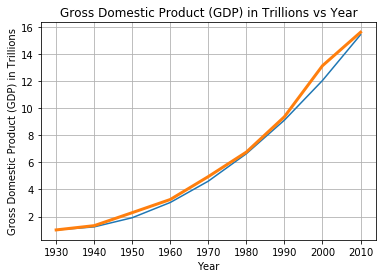

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

years = [1930,1940,1950,1960,1970,1980,1990,2000,2010]
gdp = [1.015,1.33,2.29,3.26,4.951,6.759,9.366,13.131,15.599]

t = np.arange(1930., 2020., 10.)
plt.plot(t, .00225*(t-1930)**2.+1.015)

plt.plot(years, gdp, linewidth=3)
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product (GDP) in Trillions')
plt.title('Gross Domestic Product (GDP) in Trillions vs Year')
plt.grid(True)